In [94]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

from sklearn import metrics
from time import time
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.feature_selection import SelectFromModel


In [95]:
df = pd.read_excel('customer_churn.xlsx')

# Explore

In [96]:
df.head()

,CustomerID,Count,Country,State,City,Zip Code,Lat Long,Latitude,Longitude,Gender,...,Streaming TV,Streaming Movies,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Label,Churn Value,Churn Reason
0,3668-QPYBK,1,United States,California,Los Angeles,90003,"33.964131, -118.272783",33.964131,-118.272783,Male,...,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1,Competitor made better offer
1,9237-HQITU,1,United States,California,Los Angeles,90005,"34.059281, -118.30742",34.059281,-118.307420,Female,...,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1,Moved
2,9305-CDSKC,1,United States,California,Los Angeles,90006,"34.048013, -118.293953",34.048013,-118.293953,Female,...,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes,1,Moved
3,7892-POOKP,1,United States,California,Los Angeles,90010,"34.062125, -118.315709",34.062125,-118.315709,Female,...,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes,1,Moved
4,0280-XJGEX,1,United States,California,Los Angeles,90015,"34.039224, -118.266293",34.039224,-118.266293,Male,...,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.3,Yes,1,Competitor had better devices


In [97]:
df.tail()

,CustomerID,Count,Country,State,City,Zip Code,Lat Long,Latitude,Longitude,Gender,...,Streaming TV,Streaming Movies,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Label,Churn Value,Churn Reason
7038,2569-WGERO,1,United States,California,Landers,92285,"34.341737, -116.539416",34.341737,-116.539416,Female,...,No internet service,No internet service,Two year,Yes,Bank transfer (automatic),21.15,1419.4,No,0,NaN
7039,6840-RESVB,1,United States,California,Adelanto,92301,"34.667815, -117.536183",34.667815,-117.536183,Male,...,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No,0,NaN
7040,2234-XADUH,1,United States,California,Amboy,92304,"34.559882, -115.637164",34.559882,-115.637164,Female,...,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No,0,NaN
7041,4801-JZAZL,1,United States,California,Angelus Oaks,92305,"34.1678, -116.86433",34.167800,-116.864330,Female,...,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No,0,NaN
7042,3186-AJIEK,1,United States,California,Apple Valley,92308,"34.424926, -117.184503",34.424926,-117.184503,Male,...,Yes,Yes,Two year,Yes,Bank transfer (automatic),105.65,6844.5,No,0,NaN


In [98]:
df.shape

(7043, 31)

In [99]:
df.columns

Index(['CustomerID', 'Count', 'Country', 'State', 'City', 'Zip Code',
       'Lat Long', 'Latitude', 'Longitude', 'Gender', 'Senior Citizen',
       'Partner', 'Dependents', 'Tenure Months', 'Phone Service',
       'Multiple Lines', 'Internet Service', 'Online Security',
       'Online Backup', 'Device Protection', 'Tech Support', 'Streaming TV',
       'Streaming Movies', 'Contract', 'Paperless Billing', 'Payment Method',
       'Monthly Charges', 'Total Charges', 'Churn Label', 'Churn Value',
       'Churn Reason'],
      dtype='object')

# EDA

### 1. Organise the column names

In [100]:
df.columns = (df.columns
              .str.replace('\s','_',regex=True)
              .str.lower()
              .copy()
              )

In [101]:
df.columns

Index(['customerid', 'count', 'country', 'state', 'city', 'zip_code',
       'lat_long', 'latitude', 'longitude', 'gender', 'senior_citizen',
       'partner', 'dependents', 'tenure_months', 'phone_service',
       'multiple_lines', 'internet_service', 'online_security',
       'online_backup', 'device_protection', 'tech_support', 'streaming_tv',
       'streaming_movies', 'contract', 'paperless_billing', 'payment_method',
       'monthly_charges', 'total_charges', 'churn_label', 'churn_value',
       'churn_reason'],
      dtype='object')

### 2. Null check

In [102]:
df.isnull().sum()

## churn_reason contains nulls

customerid              0
count                   0
country                 0
state                   0
city                    0
zip_code                0
lat_long                0
latitude                0
longitude               0
gender                  0
senior_citizen          0
partner                 0
dependents              0
tenure_months           0
phone_service           0
multiple_lines          0
internet_service        0
online_security         0
online_backup           0
device_protection       0
tech_support            0
streaming_tv            0
streaming_movies        0
contract                0
paperless_billing       0
payment_method          0
monthly_charges         0
total_charges           0
churn_label             0
churn_value             0
churn_reason         5174
dtype: int64

In [103]:
df.churn_reason.value_counts()

Attitude of support person                   192
Competitor offered higher download speeds    189
Competitor offered more data                 162
Don't know                                   154
Competitor made better offer                 140
Attitude of service provider                 135
Competitor had better devices                130
Network reliability                          103
Product dissatisfaction                      102
Price too high                                98
Service dissatisfaction                       89
Lack of self-service on Website               88
Extra data charges                            57
Moved                                         53
Limited range of services                     44
Long distance charges                         44
Lack of affordable download/upload speed      44
Poor expertise of phone support               20
Poor expertise of online support              19
Deceased                                       6
Name: churn_reason, 

In [104]:
df.churn_value.value_counts()

0    5174
1    1869
Name: churn_value, dtype: int64

### 3. Check data types

In [105]:
df.dtypes

customerid            object
count                  int64
country               object
state                 object
city                  object
zip_code               int64
lat_long              object
latitude             float64
longitude            float64
gender                object
senior_citizen        object
partner               object
dependents            object
tenure_months          int64
phone_service         object
multiple_lines        object
internet_service      object
online_security       object
online_backup         object
device_protection     object
tech_support          object
streaming_tv          object
streaming_movies      object
contract              object
paperless_billing     object
payment_method        object
monthly_charges      float64
total_charges         object
churn_label           object
churn_value            int64
churn_reason          object
dtype: object

In [106]:
df.head()

,customerid,count,country,state,city,zip_code,lat_long,latitude,longitude,gender,...,streaming_tv,streaming_movies,contract,paperless_billing,payment_method,monthly_charges,total_charges,churn_label,churn_value,churn_reason
0,3668-QPYBK,1,United States,California,Los Angeles,90003,"33.964131, -118.272783",33.964131,-118.272783,Male,...,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1,Competitor made better offer
1,9237-HQITU,1,United States,California,Los Angeles,90005,"34.059281, -118.30742",34.059281,-118.307420,Female,...,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1,Moved
2,9305-CDSKC,1,United States,California,Los Angeles,90006,"34.048013, -118.293953",34.048013,-118.293953,Female,...,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes,1,Moved
3,7892-POOKP,1,United States,California,Los Angeles,90010,"34.062125, -118.315709",34.062125,-118.315709,Female,...,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes,1,Moved
4,0280-XJGEX,1,United States,California,Los Angeles,90015,"34.039224, -118.266293",34.039224,-118.266293,Male,...,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.3,Yes,1,Competitor had better devices


### count - only contains 1 value

In [107]:
print(len(df.loc[df['count']==1]))

7043


### gender - need it to be numerical
Also rename to 'sex' for as that is what the column actually represents

In [108]:
df.gender.nunique()

2

In [109]:
df.gender = df.gender.map({'Male':0,'Female':1})

In [110]:
df.rename(columns={'gender':'sex'},inplace=True)

In [111]:
df.head()

,customerid,count,country,state,city,zip_code,lat_long,latitude,longitude,sex,...,streaming_tv,streaming_movies,contract,paperless_billing,payment_method,monthly_charges,total_charges,churn_label,churn_value,churn_reason
0,3668-QPYBK,1,United States,California,Los Angeles,90003,"33.964131, -118.272783",33.964131,-118.272783,0,...,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1,Competitor made better offer
1,9237-HQITU,1,United States,California,Los Angeles,90005,"34.059281, -118.30742",34.059281,-118.307420,1,...,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1,Moved
2,9305-CDSKC,1,United States,California,Los Angeles,90006,"34.048013, -118.293953",34.048013,-118.293953,1,...,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes,1,Moved
3,7892-POOKP,1,United States,California,Los Angeles,90010,"34.062125, -118.315709",34.062125,-118.315709,1,...,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes,1,Moved
4,0280-XJGEX,1,United States,California,Los Angeles,90015,"34.039224, -118.266293",34.039224,-118.266293,0,...,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.3,Yes,1,Competitor had better devices


### check other binary & map for multiple columns

In [112]:
df.nunique()

customerid           7043
count                   1
country                 1
state                   1
city                 1129
zip_code             1652
lat_long             1652
latitude             1652
longitude            1651
sex                     2
senior_citizen          2
partner                 2
dependents              2
tenure_months          73
phone_service           2
multiple_lines          3
internet_service        3
online_security         3
online_backup           3
device_protection       3
tech_support            3
streaming_tv            3
streaming_movies        3
contract                3
paperless_billing       2
payment_method          4
monthly_charges      1585
total_charges        6531
churn_label             2
churn_value             2
churn_reason           20
dtype: int64

In [113]:
## All these have been checked to be binary first

df.senior_citizen = df.senior_citizen.map({'No':0,'Yes':1})
df.partner = df.partner.map({'No':0,'Yes':1})
df.dependents = df.dependents.map({'No':0,'Yes':1})
df.phone_service = df.phone_service.map({'No':0,'Yes':1})
df.paperless_billing = df.paperless_billing.map({'No':0,'Yes':1})

### There are a number of columns that are not binary: following a trend of: 'yes','no','no ... service',

These will be one hot encoded

In [114]:
df.payment_method.value_counts()

Electronic check             2365
Mailed check                 1612
Bank transfer (automatic)    1544
Credit card (automatic)      1522
Name: payment_method, dtype: int64

In [115]:
df.dtypes

customerid            object
count                  int64
country               object
state                 object
city                  object
zip_code               int64
lat_long              object
latitude             float64
longitude            float64
sex                    int64
senior_citizen         int64
partner                int64
dependents             int64
tenure_months          int64
phone_service          int64
multiple_lines        object
internet_service      object
online_security       object
online_backup         object
device_protection     object
tech_support          object
streaming_tv          object
streaming_movies      object
contract              object
paperless_billing      int64
payment_method        object
monthly_charges      float64
total_charges         object
churn_label           object
churn_value            int64
churn_reason          object
dtype: object

In [116]:
# ## One Hot Encoding
#
# X_train=pd.get_dummies(data = X_train, columns = ['multiple_lines','internet_service','online_security','online_backup','device_protection','tech_support','streaming_movies','streaming_tv','contract','payment_method'], drop_first=True)

### Checking churn_value is a numerical representation for churn_label

In [117]:
## How many passengers survived v.s perished?
print(len(df.loc[df['churn_value']==0]),"- No")
print(len(df.loc[df['churn_value']==1]),"- Yes")

5174 - No
1869 - Yes


In [118]:
print(len(df.loc[df['churn_label']=='No']),"- No")
print(len(df.loc[df['churn_label']=='Yes']),"- Yes")

5174 - No
1869 - Yes


Confirmed

also 0=No, 1=Yes

### Total Charge
' ' values need to be replaced to convert to a float
the following code only works once the split has been completed

In [119]:
# ## New list without the space values, so the mean can be calculated
# space=X_train.loc[X_train['total_charges']!=' '][['total_charges']]
#
# ## Find the mean
# space_mean=np.mean(space['total_charges'])
#
# ## Apply mean to the ' ' values
# X_train['total_charges']=X_train['total_charges'].replace(' ',space_mean)
#
# ## Change datatype to float
# X_train = X_train.astype({'total_charges':'float'})

# Correlation Analysis


### Prep

In [120]:
ca=df[[
    'city',
    # 'zip_code',
    'sex',
    'senior_citizen',
    'partner',
    'dependents',
    'tenure_months',
    'phone_service',
    'multiple_lines',
    'internet_service',
    'online_security',
    'online_backup',
    'device_protection',
    'tech_support',
    'streaming_tv',
    'streaming_movies',
    'contract',
    'paperless_billing',
    'payment_method',
    'monthly_charges',
    'total_charges',
    'churn_reason',
    'churn_value'
]]

In [121]:
## One hot encoding

ca=pd.get_dummies(data = ca, columns = ['multiple_lines','internet_service','online_security','online_backup','device_protection','tech_support','streaming_movies','streaming_tv','contract','payment_method'], drop_first=True)

In [122]:
## Filling the '\s' values

## New list without the space values, so the mean can be calculated
space=ca.loc[ca['total_charges']!=' '][['total_charges']]

## Find the mean
space_mean=np.mean(space['total_charges'])

## Apply mean to the ' ' values
ca['total_charges']=ca['total_charges'].replace(' ',space_mean)

## Change datatype to float
ca = ca.astype({'total_charges':'float'})

In [123]:
ca.head()

,city,sex,senior_citizen,partner,dependents,tenure_months,phone_service,paperless_billing,monthly_charges,total_charges,...,tech_support_Yes,streaming_movies_No internet service,streaming_movies_Yes,streaming_tv_No internet service,streaming_tv_Yes,contract_One year,contract_Two year,payment_method_Credit card (automatic),payment_method_Electronic check,payment_method_Mailed check
0,Los Angeles,0,0,0,0,2,1,1,53.85,108.15,...,0,0,0,0,0,0,0,0,0,1
1,Los Angeles,1,0,0,1,2,1,1,70.70,151.65,...,0,0,0,0,0,0,0,0,1,0
2,Los Angeles,1,0,0,1,8,1,1,99.65,820.50,...,0,0,1,0,1,0,0,0,1,0
3,Los Angeles,1,0,1,1,28,1,1,104.80,3046.05,...,1,0,1,0,1,0,0,0,1,0
4,Los Angeles,0,0,0,1,49,1,1,103.70,5036.30,...,0,0,1,0,1,0,0,0,0,0


### Analysis

In [124]:
ca.corr()

C:\Users\44796\AppData\Local\Temp\ipykernel_13700\976676978.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  ca.corr()


,sex,senior_citizen,partner,dependents,tenure_months,phone_service,paperless_billing,monthly_charges,total_charges,churn_value,...,tech_support_Yes,streaming_movies_No internet service,streaming_movies_Yes,streaming_tv_No internet service,streaming_tv_Yes,contract_One year,contract_Two year,payment_method_Credit card (automatic),payment_method_Electronic check,payment_method_Mailed check
sex,1.000000,0.001874,0.001808,-0.005229,-0.005106,0.006488,0.011754,0.014569,-0.000048,0.008612,...,0.009212,-0.006026,0.010487,-0.006026,0.008393,-0.008026,0.003695,-0.001215,-0.000752,-0.013744
senior_citizen,0.001874,1.000000,0.016479,-0.174396,0.016567,0.008576,0.156530,0.220173,0.102395,0.150889,...,-0.060625,-0.182742,0.120176,-0.182742,0.105378,-0.046262,-0.117000,-0.024135,0.171718,-0.153477
partner,0.001808,0.016479,1.000000,0.363430,0.379697,0.017706,-0.014877,0.096848,0.318812,-0.150448,...,0.119999,0.000615,0.117412,0.000615,0.124666,0.082783,0.248091,0.082029,-0.083852,-0.095125
dependents,-0.005229,-0.174396,0.363430,1.000000,0.131376,0.000625,-0.118963,-0.144206,0.032128,-0.248542,...,0.028811,0.172110,-0.073364,0.172110,-0.057717,0.014680,0.190262,0.041254,-0.141476,0.071056
tenure_months,-0.005106,0.016567,0.379697,0.131376,1.000000,0.008448,0.006152,0.247900,0.824757,-0.352229,...,0.324221,-0.039062,0.286111,-0.039062,0.279756,0.202570,0.558533,0.233006,-0.208363,-0.233852
phone_service,0.006488,0.008576,0.017706,0.000625,0.008448,1.000000,0.016505,0.247398,0.112851,0.011942,...,-0.096340,0.172209,-0.032959,0.172209,-0.022574,-0.002791,0.003519,-0.007721,0.003062,-0.003319
paperless_billing,0.011754,0.156530,-0.014877,-0.118963,0.006152,0.016505,1.000000,0.352150,0.157676,0.191825,...,0.037880,-0.321013,0.211716,-0.321013,0.223841,-0.051391,-0.147889,-0.013589,0.208865,-0.205398
monthly_charges,0.014569,0.220173,0.096848,-0.144206,0.247900,0.247398,0.352150,1.000000,0.650468,0.193356,...,0.338304,-0.763557,0.627429,-0.763557,0.629603,0.004904,-0.074681,0.030550,0.271625,-0.377437
total_charges,-0.000048,0.102395,0.318812,0.032128,0.824757,0.112851,0.157676,0.650468,1.000000,-0.199428,...,0.432480,-0.374263,0.519574,-0.374263,0.515314,0.170491,0.357224,0.182581,-0.060412,-0.294125
churn_value,0.008612,0.150889,-0.150448,-0.248542,-0.352229,0.011942,0.191825,0.193356,-0.199428,1.000000,...,-0.164674,-0.227890,0.061382,-0.227890,0.063228,-0.177820,-0.302253,-0.134302,0.301919,-0.091683


C:\Users\44796\AppData\Local\Temp\ipykernel_13700\4141010129.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(ca.corr(),
C:\Users\44796\AppData\Local\Temp\ipykernel_13700\4141010129.py:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  mask=np.triu(np.ones_like(ca.corr())),


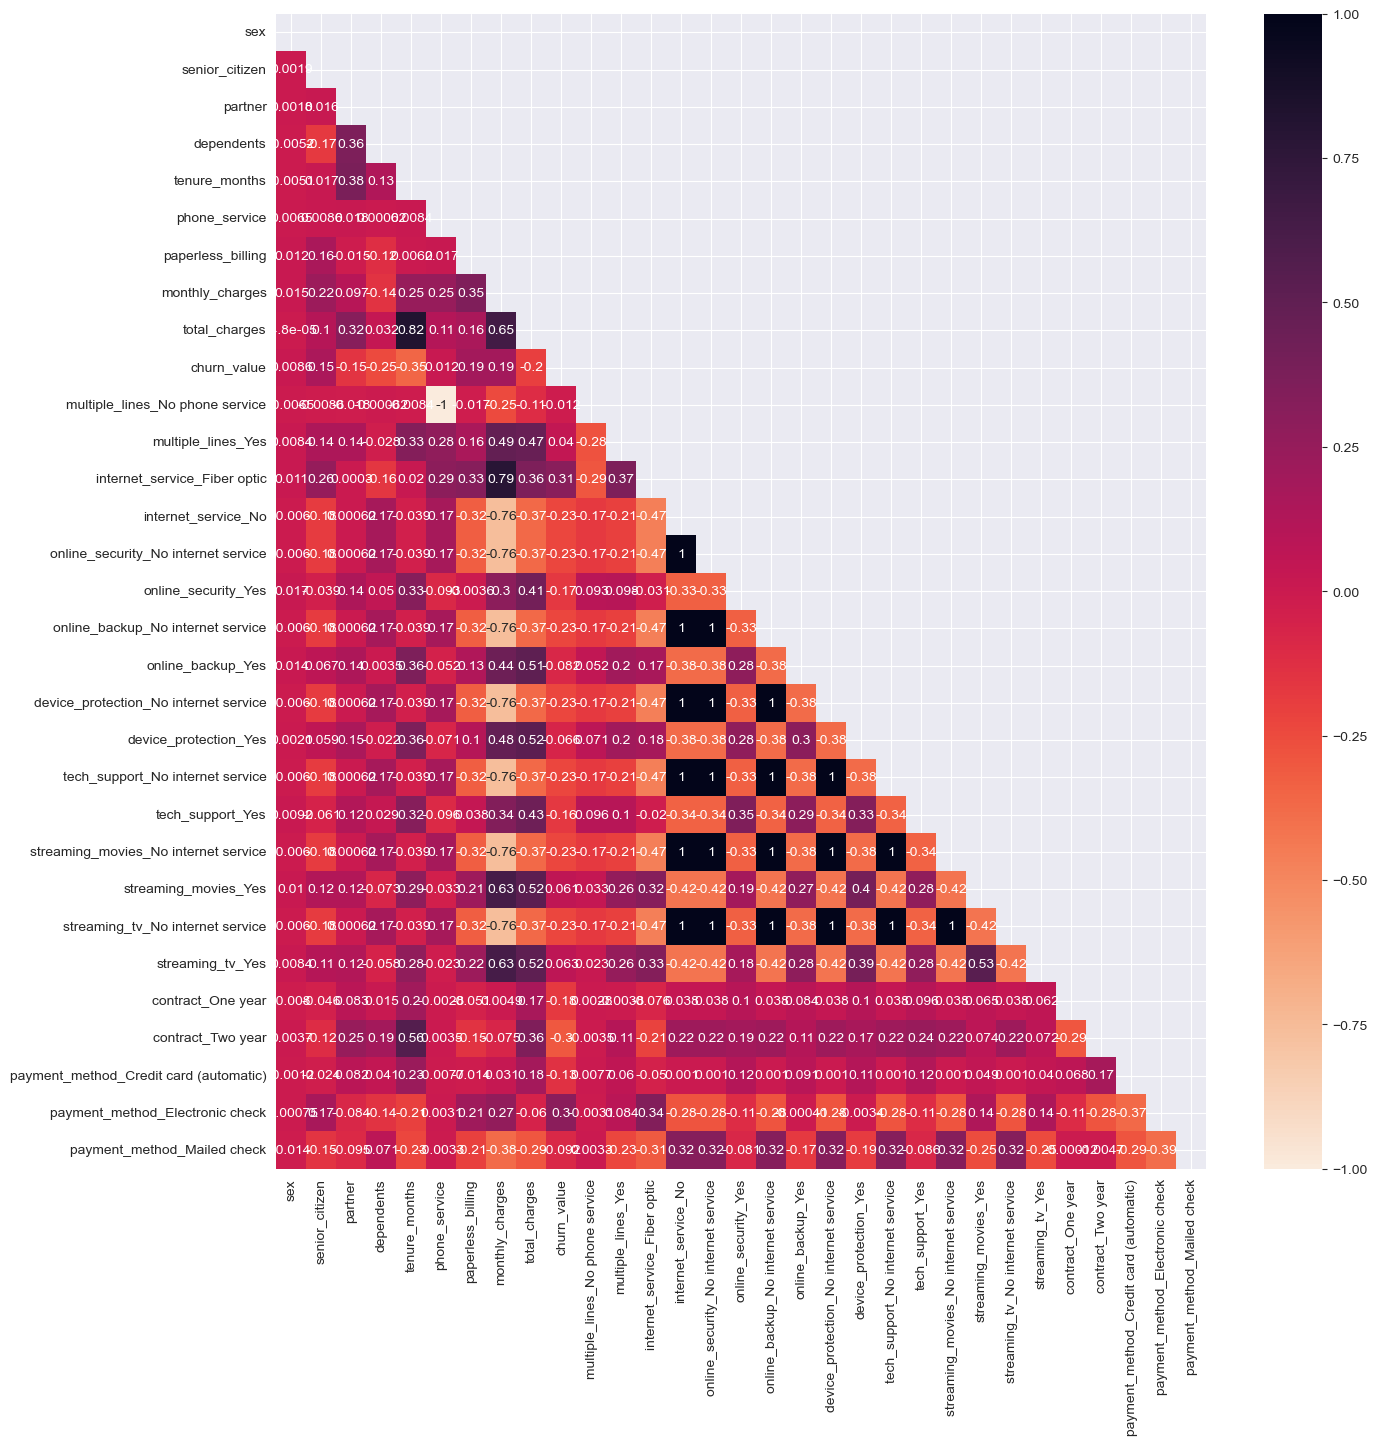

In [125]:
plt.figure(figsize=(15,15))
sns.heatmap(ca.corr(),
            annot=True,
            mask=np.triu(np.ones_like(ca.corr())),
            cmap='rocket_r')
plt.show()

### Ranking features based on corrolation to target (churn_value)

In [126]:
## Creating a correlation rank

rankedcorr=ca[ca.columns[1:]].corr()['churn_value'].reset_index()
rankedcorr['churn_value']=rankedcorr['churn_value'].abs()
rankedcorr=rankedcorr.sort_values(['churn_value'],ascending=False)
rankedcorr

C:\Users\44796\AppData\Local\Temp\ipykernel_13700\2918626864.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  rankedcorr=ca[ca.columns[1:]].corr()['churn_value'].reset_index()


,index,churn_value
9,churn_value,1.000000
4,tenure_months,0.352229
12,internet_service_Fiber optic,0.308020
27,contract_Two year,0.302253
29,payment_method_Electronic check,0.301919
3,dependents,0.248542
22,streaming_movies_No internet service,0.227890
18,device_protection_No internet service,0.227890
14,online_security_No internet service,0.227890
13,internet_service_No,0.227890


In [127]:
top10=rankedcorr.drop(columns=['churn_value']).head(11)
top10

,index
9,churn_value
4,tenure_months
12,internet_service_Fiber optic
27,contract_Two year
29,payment_method_Electronic check
3,dependents
22,streaming_movies_No internet service
18,device_protection_No internet service
14,online_security_No internet service
13,internet_service_No


In [128]:
top10=[
    'tenure_months',
    'internet_service_Fiber optic',
    'contract_Two year',
    'payment_method_Electronic check',
    'dependents',
    'streaming_movies_No internet service',
    'device_protection_No internet service',
    'online_security_No internet service',
    'internet_service_No',
    'online_backup_No internet service'
 ]


### using sklearn select from model

In [129]:
ca.columns

Index(['city', 'sex', 'senior_citizen', 'partner', 'dependents',
       'tenure_months', 'phone_service', 'paperless_billing',
       'monthly_charges', 'total_charges', 'churn_reason', 'churn_value',
       'multiple_lines_No phone service', 'multiple_lines_Yes',
       'internet_service_Fiber optic', 'internet_service_No',
       'online_security_No internet service', 'online_security_Yes',
       'online_backup_No internet service', 'online_backup_Yes',
       'device_protection_No internet service', 'device_protection_Yes',
       'tech_support_No internet service', 'tech_support_Yes',
       'streaming_movies_No internet service', 'streaming_movies_Yes',
       'streaming_tv_No internet service', 'streaming_tv_Yes',
       'contract_One year', 'contract_Two year',
       'payment_method_Credit card (automatic)',
       'payment_method_Electronic check', 'payment_method_Mailed check'],
      dtype='object')

In [130]:
ca.head()

,city,sex,senior_citizen,partner,dependents,tenure_months,phone_service,paperless_billing,monthly_charges,total_charges,...,tech_support_Yes,streaming_movies_No internet service,streaming_movies_Yes,streaming_tv_No internet service,streaming_tv_Yes,contract_One year,contract_Two year,payment_method_Credit card (automatic),payment_method_Electronic check,payment_method_Mailed check
0,Los Angeles,0,0,0,0,2,1,1,53.85,108.15,...,0,0,0,0,0,0,0,0,0,1
1,Los Angeles,1,0,0,1,2,1,1,70.70,151.65,...,0,0,0,0,0,0,0,0,1,0
2,Los Angeles,1,0,0,1,8,1,1,99.65,820.50,...,0,0,1,0,1,0,0,0,1,0
3,Los Angeles,1,0,1,1,28,1,1,104.80,3046.05,...,1,0,1,0,1,0,0,0,1,0
4,Los Angeles,0,0,0,1,49,1,1,103.70,5036.30,...,0,0,1,0,1,0,0,0,0,0


In [131]:
## Creating a numerical only feature list

ca_sk=[ 'sex', 'senior_citizen', 'partner', 'dependents',
       'tenure_months', 'phone_service', 'paperless_billing',
       'monthly_charges', 'total_charges',
       'multiple_lines_No phone service', 'multiple_lines_Yes',
       'internet_service_Fiber optic', 'internet_service_No',
       'online_security_No internet service', 'online_security_Yes',
       'online_backup_No internet service', 'online_backup_Yes',
       'device_protection_No internet service', 'device_protection_Yes',
       'tech_support_No internet service', 'tech_support_Yes',
       'streaming_movies_No internet service', 'streaming_movies_Yes',
       'streaming_tv_No internet service', 'streaming_tv_Yes',
       'contract_One year', 'contract_Two year',
       'payment_method_Credit card (automatic)',
       'payment_method_Electronic check', 'payment_method_Mailed check']

In [132]:
# Applying to select from model

sel = SelectFromModel(RandomForestClassifier(n_estimators = 100))
sel.fit(ca[ca_sk], ca['churn_value'])

SelectFromModel(estimator=RandomForestClassifier())

In [133]:
selected_feat= ca[ca_sk].columns[(sel.get_support())]
len(selected_feat)

6

In [134]:
## Showing the SelectFromModel selected features
print(selected_feat)

Index(['dependents', 'tenure_months', 'monthly_charges', 'total_charges',
       'internet_service_Fiber optic', 'payment_method_Electronic check'],
      dtype='object')
